In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\ProgramData\Anaconda3\Missing_Data.csv")

df


,HOUSE_NUM,HOUSE_NAME,OCCUPIED,NUM_BEDROOMS
0,101.0,SIERRA,Y,3
1,127.0,OAK,N,3
2,NaN,LEXINGTON,N,NaN
3,201.0,BLOSSOMS,12,1
4,230.0,BLOSSOMS,Y,3
5,207.0,LITTLE WOOD,Y,NaN
6,NaN,HOPE CORNER,NaN,2
7,213.0,THE CHERRIES,Y,--
8,215.0,BROOKVALE,Y,NaN


In [16]:
df['HOUSE_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: HOUSE_NUM, dtype: bool

In [17]:
df['HOUSE_NAME'].fillna(125)

0          SIERRA
1             OAK
2       LEXINGTON
3        BLOSSOMS
4        BLOSSOMS
5     LITTLE WOOD
6     HOPE CORNER
7    THE CHERRIES
8       BROOKVALE
Name: HOUSE_NAME, dtype: object

In [14]:
df['OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OCCUPIED, dtype: object

In [21]:
df['HOUSE_NUM'].fillna(125, inplace=True)
df

,HOUSE_NUM,HOUSE_NAME,OCCUPIED,NUM_BEDROOMS
0,101.0,SIERRA,Y,3
1,127.0,OAK,N,3
2,125.0,LEXINGTON,N,125
3,201.0,BLOSSOMS,12,1
4,230.0,BLOSSOMS,Y,3
5,207.0,LITTLE WOOD,Y,125
6,125.0,HOPE CORNER,NaN,2
7,213.0,THE CHERRIES,Y,--
8,215.0,BROOKVALE,Y,125


In [39]:
df = pd.read_csv('C:\ProgramData\Anaconda3\Missing_Data.csv', na_values = ["NaN","--","YY"])
df

,HOUSE_NUM,HOUSE_NAME,OCCUPIED,NUM_BEDROOMS
0,101.0,SIERRA,Y,3.0
1,127.0,OAK,N,3.0
2,NaN,LEXINGTON,N,NaN
3,201.0,BLOSSOMS,12,1.0
4,230.0,BLOSSOMS,Y,3.0
5,207.0,LITTLE WOOD,Y,NaN
6,NaN,HOPE CORNER,NaN,2.0
7,213.0,THE CHERRIES,Y,NaN
8,215.0,BROOKVALE,Y,NaN


In [52]:
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].median(), inplace = True)
df

,HOUSE_NUM,HOUSE_NAME,OCCUPIED,NUM_BEDROOMS
0,101.0,SIERRA,Y,3.0
1,127.0,OAK,N,3.0
2,NaN,LEXINGTON,N,3.0
3,201.0,BLOSSOMS,N,1.0
4,230.0,BLOSSOMS,Y,3.0
5,207.0,LITTLE WOOD,Y,3.0
6,NaN,HOPE CORNER,N,2.0
7,213.0,THE CHERRIES,Y,3.0
8,215.0,BROOKVALE,Y,3.0


0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [48]:
count = 0
for row in df['OCCUPIED']:
    try:
        int(row)
        df.loc[count,'OCCUPIED']=np.nan
    except:
        pass
    count+=1

df['OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OCCUPIED, dtype: object

In [49]:
df['OCCUPIED'].fillna('N', inplace = True)
df['OCCUPIED']

0    Y
1    N
2    N
3    N
4    Y
5    Y
6    N
7    Y
8    Y
Name: OCCUPIED, dtype: object

In [59]:
df2 = pd.read_csv("C:\ProgramData\Anaconda3\Outliers_Data.csv")
df2

,Age
0,5
1,5
2,5
3,5
4,50
5,50
6,50
7,50
8,50
9,50


In [62]:
import matplotlib.pyplot as plt

import seaborn as sns

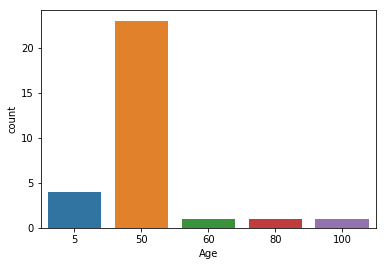

In [64]:
sns.countplot(x='Age',data=df2)

In [70]:
lower_bound=0.1
upper_bound=0.9
res=df2['Age'].quantile(
[lower_bound,upper_bound])


res

0.1     5.0
0.9    51.0
Name: Age, dtype: float64

In [79]:
true_index = (res.loc[lower_bound]<df2.Age.values) & (df2.Age.values<res.loc[upper_bound])
true_index
false_index =~ true_index


array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False])

In [81]:
df2.Age[false_index]

0       5
1       5
2       5
3       5
18     60
28    100
29     80
Name: Age, dtype: int64